## Data Science Project: Bank Marketing (Campaign) Week 12 Model Selection
<b>Team Member's Details:</b> Group name - Data Science Enthusiasts

<b>NAME :</b> Abhimanyu Gangani

<b>EMAIL ID :</b> agangani97@gmail.com

<b>COUNTRY :</b> United Kingdom

<b>COLLEGE :</b> Anglia Ruskin University

<b>SPECIALIZATION :</b>Data Science


In [1]:
#Importing necessary Libararies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading dataset

In [2]:
# bank-additional data
bank_add_full = pd.read_csv('Dataset/bank-additional-full.csv', delimiter = ';')
bank_add = pd.read_csv('Dataset/bank-additional.csv', delimiter = ';')

# bank-full data
bank_full = pd.read_csv('Dataset/bank-full.csv', delimiter = ';')
bank = pd.read_csv('Dataset/bank.csv', delimiter = ';')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank_add.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [6]:
bank_add_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Duplicate Rows

In [7]:
duplicates = bank_full[bank_full.duplicated()]
print(f'Total number of duplicated rows in bank_full are {duplicates.shape[0]}')

Total number of duplicated rows in bank_full are 0


In [8]:
duplicates = bank_add_full[bank_add_full.duplicated()]
print(f'Total number of duplicated rows in bank_add_full are {duplicates.shape[0]}')

Total number of duplicated rows in bank_add_full are 12


In [9]:
#Dropping duplicate rows
print(bank_add_full.shape)
print('Dropping duplicate rows')
bank_add_full.drop_duplicates(inplace=True)
print(bank_add_full.shape)


(41188, 21)
Dropping duplicate rows
(41176, 21)


In [10]:
duplicates = bank_add_full[bank_add_full.duplicated()]
print(f'Total number of duplicated rows in bank_add_full are {duplicates.shape[0]}')

Total number of duplicated rows in bank_add_full are 0


- Duration feature highly affects the target variable y, if the call is not performed, the duration will have a value 0 and this makes the target variable to 0 as well for corresponding entry. this will hinder the realastic predictive model.

### Dropping Duration feature

In [11]:
# Dropping duration feature from our datasets
bank_add_full.drop('duration', axis = 1, inplace = True)
bank_add.drop('duration', axis = 1, inplace = True)  

- In our previous analysis of this projects we know there is no outlier treatment needed(outlier in age and campagin features are realastic).

### Correlation Matrix

/var/folders/31/xq_cv4t950vgtx845ykjgdc80000gn/T/ipykernel_29155/1390518872.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bank_add_full.corr(),annot=True, cmap = 'YlGnBu')


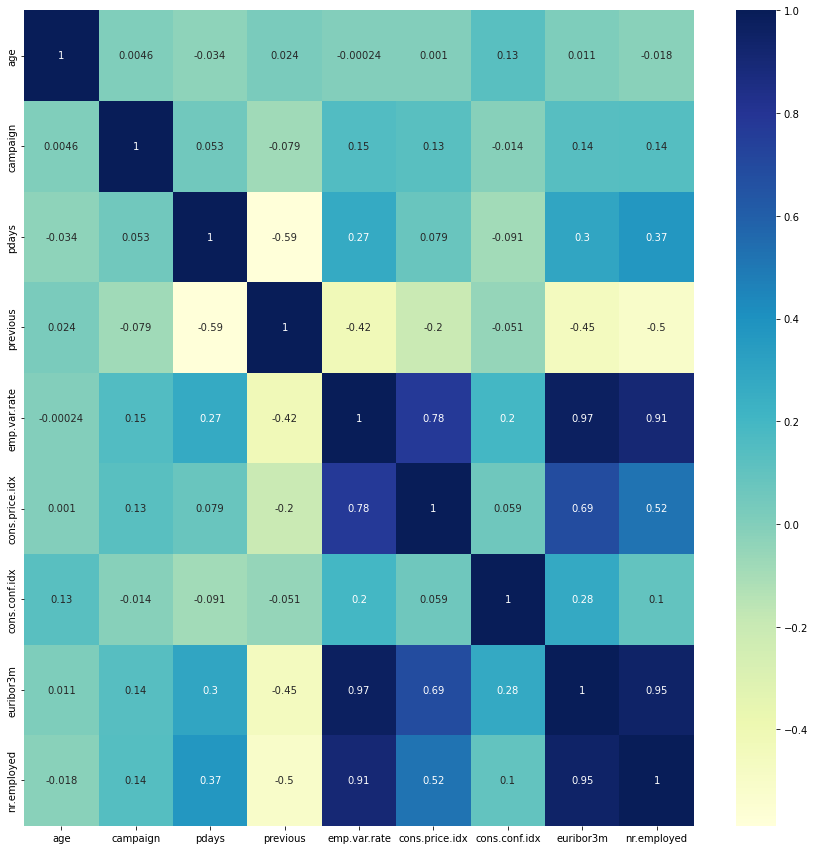

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(bank_add_full.corr(),annot=True, cmap = 'YlGnBu')
plt.show()

- It is evident from the heatmap that emp.var.rate, euribor3m and nr.employed are high correlated features.

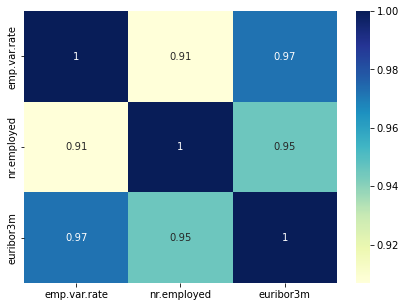

In [13]:
#Checking correlation between emp.var.rate,nr.employed,euribor3m
plt.figure(figsize=(7,5))
sns.heatmap(bank_add_full[['emp.var.rate','nr.employed','euribor3m']].corr(),annot=True, cmap = 'YlGnBu')
plt.show()

- here we will drop the employed and emp.var.rate features as these are highly correlated and euribor feature is the one which tells us about the Euro interbank offered rate. This feature tells us about the interest rate at which banks lend money to each other.


In [14]:
#Dropping emp.var.rate and nr.employed

bank_add_full.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace=True)

In [15]:
#rechecking dataset
bank_add_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no


In [16]:
# Fetching the numerical and categorical variable names
bank_num_features = list(bank_add_full.select_dtypes(include = ['int64', 'float64']).columns)
print(bank_num_features)
bank_cat_features = list(bank_add_full.select_dtypes(include = ['object']).columns)
print(bank_cat_features)

['age', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [17]:
#removing target variable from categorical features
bank_cat_features.remove('y')
bank_cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

### using label encoder from sklearn 

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in bank_cat_features:
    bank_add_full[feature] = le.fit_transform(bank_add_full[feature])
    
bank_add_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,no
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,no
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,no
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,no
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,93.994,-36.4,4.857,no


In [19]:
bank_add_full['y'] = le.fit_transform(bank_add_full['y'])
bank_add_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,93.994,-36.4,4.857,0


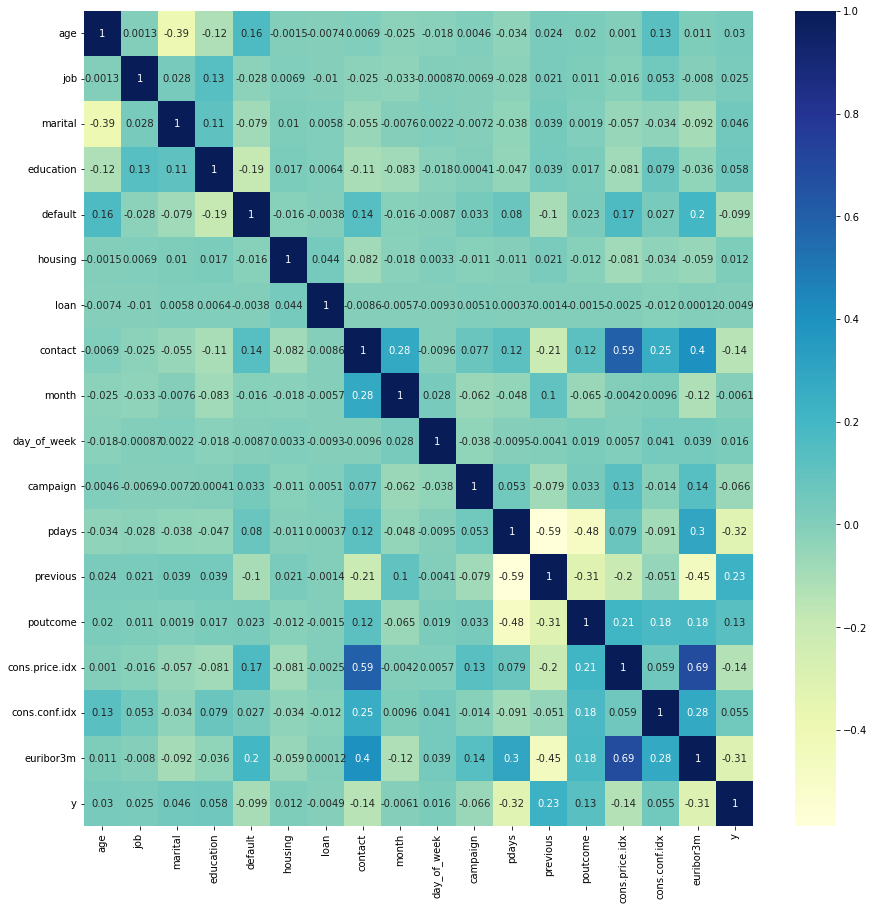

In [20]:
#checking correlation after performing label encoding
plt.figure(figsize=(15,15))
sns.heatmap(bank_add_full.corr(),annot=True, cmap = 'YlGnBu')
plt.show()

- There is no high positive or negative correlation present in our data.

In [21]:
#denoting dataframe as df for further computations
df = bank_add_full
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,93.994,-36.4,4.857,0


### Creating feature and target dataset

In [22]:
# Target and Feature set
y = bank_add_full.pop('y')
X = bank_add_full[bank_cat_features]

In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [24]:
#Checking feature dataset
X.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3,1,0,0,0,0,1,6,1,1
1,7,1,3,1,0,0,1,6,1,1
2,7,1,3,0,2,0,1,6,1,1
3,0,1,1,0,0,0,1,6,1,1
4,7,1,3,0,0,2,1,6,1,1


In [25]:
#split data in test and train datasets

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)

In [27]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30882, 10), (30882,), (10294, 10), (10294,))

### Linear and Non-Linear classifiers

### Linear Classifiers
- Logistic Regression
- Linear Discriminant Analysis

### Non Linear Classifiers
- K Nearest Neighbors
- Decision tree classifier
- Naive Bayes Classifier

In [28]:
#Models
#importing linear and non-linear models from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

models = [('Logistic Regression', LogisticRegression()), ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()), \
         ('K Nearest Neighbors', KNeighborsClassifier()), ('Decision Tree Classifier', DecisionTreeClassifier()), \
         ('Naive Bayes Classifier', GaussianNB())]
#Creating lists for names, roc_score, true positive rate, false positive rate and thresholds
names = []
roc_scores = []
fpr = []
tpr = []
thresholds = []

for name, model in models:
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    
    # ROC scores
    score = roc_auc_score(y_test, pred)
    roc_scores.append(score)
    
    # fpr, tpr, threshold
    false, true, thresh = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    fpr.append(false)
    tpr.append(true)
    thresholds.append(thresh)
    
    # name of the models
    names.append(name)

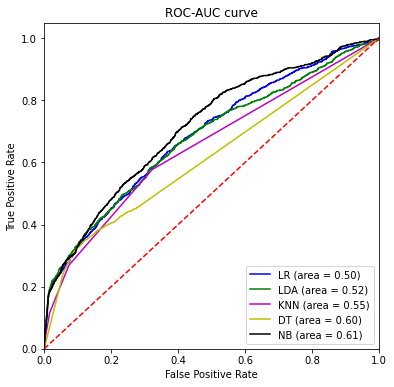

In [29]:
# Plotting the roc curves for linear and non-linear models
plt.figure(figsize = (6,6))
plt.plot(fpr[0], tpr[0], 'b-', label = 'LR (area = %0.2f)' % roc_scores[0])
plt.plot(fpr[1], tpr[1], 'g-', label = 'LDA (area = %0.2f)' % roc_scores[1])
plt.plot(fpr[2], tpr[2], 'm-', label = 'KNN (area = %0.2f)' % roc_scores[2])
plt.plot(fpr[3], tpr[3], 'y-', label = 'DT (area = %0.2f)' % roc_scores[3])
plt.plot(fpr[4], tpr[4], 'k-', label = 'NB (area = %0.2f)' % roc_scores[4])
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve')
plt.legend(loc="lower right")
plt.savefig('ROC_curves.png')
plt.show()

- Here we can observe that Naive Bayes Classifier is giving us the highest ROC_AUC score

## Ensemble methods

Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. In this section we will evaluate four different ensemble machine learning algorithms, two boosting and two bagging methods:

1. Boosting Methods:
- AdaBoost (AB) 
- Gradient Boosting (GBM).

2. Bagging Methods:
- Random Forests (RF)
- Extra Trees (ET).


In [30]:
# Ensemble methods
# Models list - Boosting and Bagging algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


models_ensemble = [('Ada Boost', AdaBoostClassifier()), ('GBM', GradientBoostingClassifier()), \
         ('RF', RandomForestClassifier()), ('ET', ExtraTreesClassifier())]

names_ensemble = []
roc_scores_ensemble = []
fpr_ensemble = []
tpr_ensemble = []
thresholds_ensemble = []

for name, model in models_ensemble:
    model.fit(X_train, y_train)
    
    pr = model.predict(X_test)
    
    # ROC scores
    sc = roc_auc_score(y_test, pr)
    roc_scores_ensemble.append(sc)
    
    # fpr, tpr, threshold
    false_e, true_e, thresh_e = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    fpr_ensemble.append(false_e)
    tpr_ensemble.append(true_e)
    thresholds_ensemble.append(thresh_e)
    
    # name of the models
    names_ensemble.append(name)

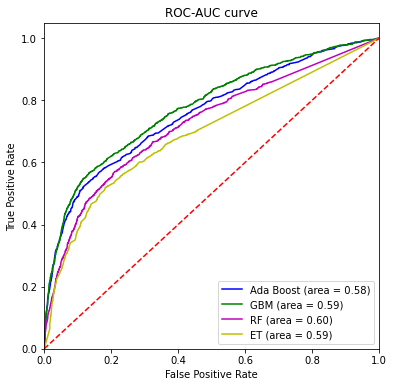

In [31]:
# Plotting the roc curves for ensemble methods
plt.figure(figsize = (6,6))
plt.plot(fpr_ensemble[0], tpr_ensemble[0], 'b-', label = 'Ada Boost (area = %0.2f)' % roc_scores_ensemble[0])
plt.plot(fpr_ensemble[1], tpr_ensemble[1], 'g-', label = 'GBM (area = %0.2f)' % roc_scores_ensemble[1])
plt.plot(fpr_ensemble[2], tpr_ensemble[2], 'm-', label = 'RF (area = %0.2f)' % roc_scores_ensemble[2])
plt.plot(fpr_ensemble[3], tpr_ensemble[3], 'y-', label = 'ET (area = %0.2f)' % roc_scores_ensemble[3])
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve')
plt.legend(loc="lower right")
# plt.savefig('ROC_curves_ensemble.png')
plt.show()

- Here we observe that random forest method is returning highest ROC_AUC score and all four models shows almost same ROC_AUC score

In [32]:
#Checking ROC_AUC score for all models
simple_roc = pd.DataFrame({'Models':names, 'ROC_AUC_Score':roc_scores})
ensemble_roc = pd.DataFrame({'Models':names_ensemble, 'ROC_AUC_Score':roc_scores_ensemble})

final_roc = pd.concat([simple_roc, ensemble_roc], ignore_index = True).sort_values('ROC_AUC_Score', ascending = False).reset_index(drop = True)
display(final_roc)  

,Models,ROC_AUC_Score
0,Naive Bayes Classifier,0.608084
1,RF,0.602007
2,Decision Tree Classifier,0.595594
3,ET,0.593260
4,GBM,0.587124
5,Ada Boost,0.582015
6,K Nearest Neighbors,0.549931
7,Linear Discriminant Analysis,0.519716
8,Logistic Regression,0.500376


The ROC_AUC scores above are obtained without applying Standard Scaler and Cross Validation techniques on the data. So the values are a basic result.

Cross-validation is a technique for evaluating a machine learning model and testing its performance. CV is commonly used in applied ML tasks. It helps to compare and select an appropriate model for the specific predictive modeling problem.

K-fold Cross-Validation is when the dataset is split into a K number of folds and is used to evaluate the model's ability when given new data. K refers to the number of groups the data sample is split into. For example, if you see that the k-value is 5, we can call this a 5-fold cross-validation.
</br>

Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems. The AUC represents a model's ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model that is as good as random.

In [33]:
num_folds = 5
scoring = 'roc_auc'
seed = 3

Let's create a baseline of performance on this problem and spot-check a number of different algorithms.

We will select a suite of different algorithms capable of working on this classification problem. The nine algorithms selected include:

1. Linear Algorithms:
Logistic Regression (LR) and Linear Discriminant Analysis (LDA).

2. Nonlinear Algorithms:
Decision Tree (DT), Gaussian Naive Bayes (NB) and k-Nearest Neighbors (KNN).

3. Ensemble Alogrithms :
AdaBoostClassifier (AB), GradientBoostingClassifier (GBM), RandomForestClassifier(RF), ExtraTreesClassifier(ET)

In [34]:
#Cross validation ROC_AUC score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
for name, model in models_ensemble:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)    

Logistic Regression: 0.671185 (0.006165)
Linear Discriminant Analysis: 0.661438 (0.007034)
K Nearest Neighbors: 0.626143 (0.006812)
Decision Tree Classifier: 0.598735 (0.011311)
Naive Bayes Classifier: 0.704496 (0.008885)
Ada Boost: 0.750668 (0.011948)
GBM: 0.765256 (0.011226)
RF: 0.706981 (0.006701)
ET: 0.674685 (0.009889)


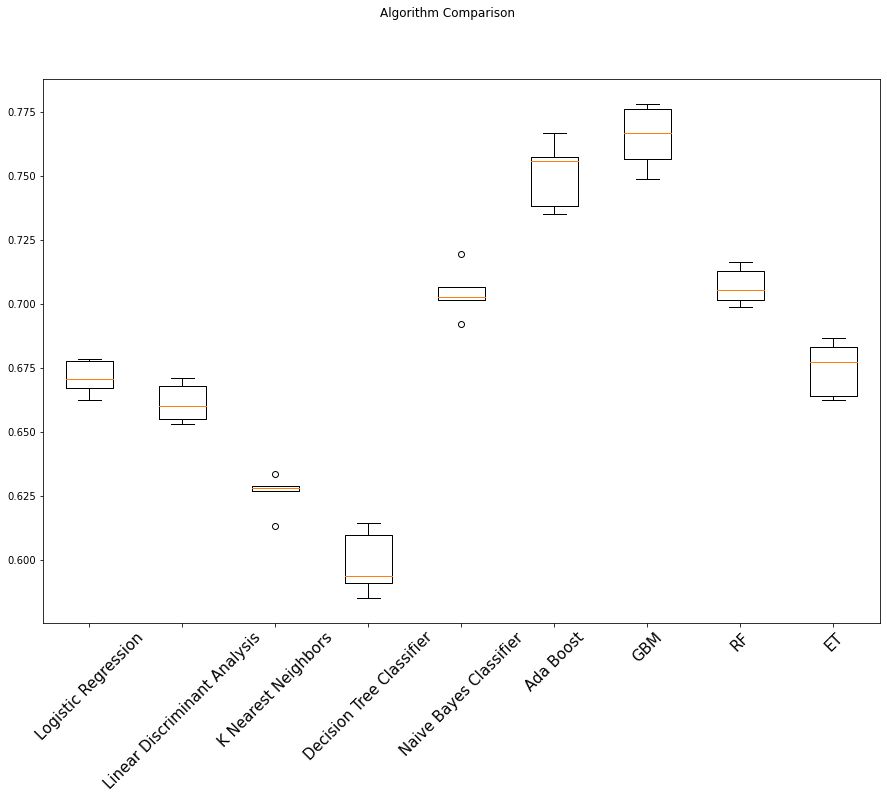

In [35]:
# Compare Algorithms ROC_AUC score after cross validation on a graph for better understanding

fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation =45,size=15)
plt.show()

### Evaluate Algorithms: Standardize Data</br>
</br>
We suspect that the differing distributions of the raw data may be negatively impacting the skill of some of the algorithms. Let's evaluate the same algorithms with a standardized copy of the dataset. This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of one. We also need to avoid data leakage when we transform the data.

A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

In [36]:
# Standardize the dataset
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


pipelines = []
pipelines.append(('ScaledLR', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('NB', GaussianNB())])))
pipelines.append(('ScaledAB', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('AB', AdaBoostClassifier())])))
pipelines.append(('ScaledGBM', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('GBM', GradientBoostingClassifier())])))
pipelines.append(('ScaledRF', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('RF', RandomForestClassifier())])))
pipelines.append(('ScaledET', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('ET', ExtraTreesClassifier())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.671140 (0.006165)
ScaledLDA: 0.661438 (0.007034)
ScaledKNN: 0.648484 (0.007381)
ScaledCART: 0.598864 (0.011736)
ScaledNB: 0.704496 (0.008885)
ScaledAB: 0.750668 (0.011948)
ScaledGBM: 0.765254 (0.011223)
ScaledRF: 0.708760 (0.006715)
ScaledET: 0.674589 (0.010704)


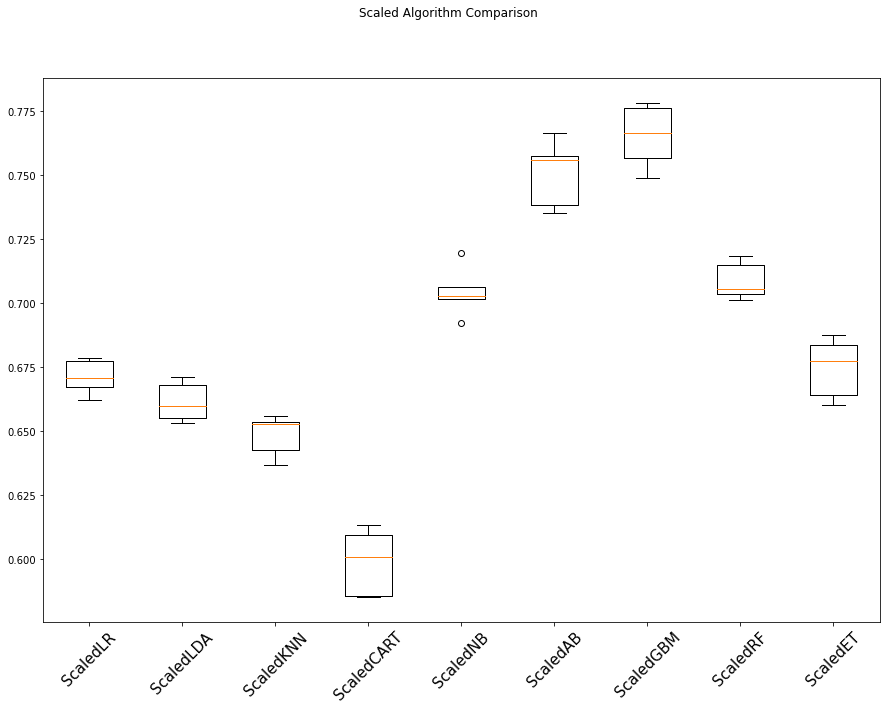

In [37]:
# Compare Algorithms after standardisng the data using Pipelines
fig = plt.figure(figsize=(15,10))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation =45,size=15)
plt.show()

We can also see that the standardization of the data has lifted the skill of KNN but still the GBM model is the most accurate algorithm tested so far.
Standardising the dataset have also reduced the variance in the roc_auc score.



The default number of boosting stages to perform (n_estimators) is 100. This is a good candidate parameter of Gradient Boosting to tune. Often, the larger the number of boosting stages, the better the performance but the longer the training time. In this section we will look at tuning the number of stages for gradient boosting. Below we define a parameter grid n_estimators values from 50 to 400 in increments of 50. Each setting is evaluated using 5-fold cross validation.

In [38]:
# Tune scaled GBM
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

Lets summarize the best configuration and get an idea of how performance changed with each different configuration.

In [39]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.766884 using {'n_estimators': 150}
0.759255 (0.011046) with: {'n_estimators': 50}
0.765256 (0.011226) with: {'n_estimators': 100}
0.766884 (0.011258) with: {'n_estimators': 150}
0.766759 (0.011326) with: {'n_estimators': 200}
0.766216 (0.011416) with: {'n_estimators': 250}
0.765713 (0.011217) with: {'n_estimators': 300}
0.765295 (0.011277) with: {'n_estimators': 350}
0.764377 (0.011406) with: {'n_estimators': 400}


We can see that the best configuration was n estimators=150 resulting in a mean squared error of 0.766885.

Finalize Model
In this section we will finalize the gradient boosting model and evaluate it on our hold out validation dataset. First we need to prepare the model and train it on the entire training dataset. This includes standardizing the training dataset before training.

In [40]:
# prepare the model standard scaling the data and applying GradientBoostingClassifier
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingClassifier(random_state=seed, n_estimators=150)
model.fit(rescaledX, y_train)

GradientBoostingClassifier(n_estimators=150, random_state=3)

We can then scale the inputs for the test dataset and generate predictions.

In [41]:
from sklearn.metrics import mean_squared_error
# transform the validation dataset
rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(mean_squared_error(y_test, predictions))

0.1037497571400816


In [42]:
# Predicting the results
final_pred = model.predict(rescaledTestX)

print(final_pred)

[0 0 0 ... 0 0 0]


In [43]:
from sklearn.metrics import roc_auc_score 

gb_roc_score = roc_auc_score(y_test, final_pred)
gb_roc_score

0.588141094507559

In [44]:
# estimate accuracy on validation dataset
from sklearn.metrics import accuracy_score

rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_test, predictions))

0.8962502428599184


In [45]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[9005  127]
 [ 941  221]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      9132
           1       0.64      0.19      0.29      1162

    accuracy                           0.90     10294
   macro avg       0.77      0.59      0.62     10294
weighted avg       0.87      0.90      0.87     10294



We can see that we achieve an accuracy of nearly 90% on the held-out test dataset. A score that matches closely to our expectations estimated above during the tuning of GBM.

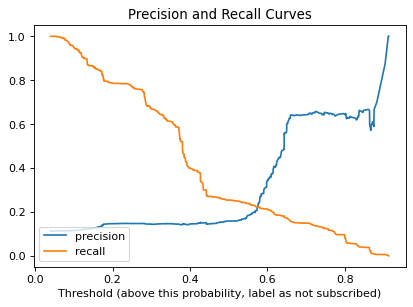

In [46]:
#precision/recall graph LG_model
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as not subscribed)');
plt.title('Precision and Recall Curves');

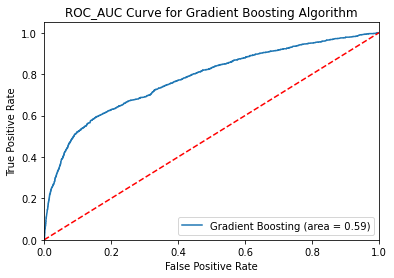

In [47]:
# ROC_AUC curve
fpr_gb, tpr_gb, threshold_gb = roc_curve(y_test, model.predict_proba(rescaledTestX)[:,1])

plt.plot(fpr_gb, tpr_gb, label = 'Gradient Boosting (area = %0.2f)' % gb_roc_score)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC Curve for Gradient Boosting Algorithm')
plt.legend(loc = 'lower right')
plt.show()

- Final Result: From all the above models GBM performed better Scored well on training and test data.

### Testing our model on bank_add

In [48]:
bank_add.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [49]:
bank_add.shape

(4119, 20)

In [50]:
bank_add.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace=True)
bank_add.shape

(4119, 18)

In [51]:
bank_add['y'] = le.fit_transform(bank_add['y'])
bank_add_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,93.994,-36.4,4.857
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,93.994,-36.4,4.857


In [52]:
for feature in bank_cat_features:
    bank_add[feature] = le.fit_transform(bank_add[feature])
    
X_test_bank = bank_add[bank_cat_features]
X_test_bank.head()

bank_add.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,30,1,1,2,0,2,0,0,6,0,2,999,0,1,92.893,-46.2,1.313,0
1,39,7,2,3,0,0,0,1,6,0,4,999,0,1,93.994,-36.4,4.855,0
2,25,7,1,3,0,2,0,1,4,4,1,999,0,1,94.465,-41.8,4.962,0
3,38,7,1,2,0,1,1,1,4,0,3,999,0,1,94.465,-41.8,4.959,0
4,47,0,1,6,0,2,0,0,7,1,1,999,0,1,93.200,-42.0,4.191,0


In [53]:
bank_add['y'] = le.fit_transform(bank_add['y'])
bank_add.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,30,1,1,2,0,2,0,0,6,0,2,999,0,1,92.893,-46.2,1.313,0
1,39,7,2,3,0,0,0,1,6,0,4,999,0,1,93.994,-36.4,4.855,0
2,25,7,1,3,0,2,0,1,4,4,1,999,0,1,94.465,-41.8,4.962,0
3,38,7,1,2,0,1,1,1,4,0,3,999,0,1,94.465,-41.8,4.959,0
4,47,0,1,6,0,2,0,0,7,1,1,999,0,1,93.200,-42.0,4.191,0


In [54]:
y_test_bank = bank_add['y']
y_test_bank

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: int64

In [55]:
from sklearn.metrics import mean_squared_error
# transform the validation dataset
rescaledTestX = scaler.transform(X_test_bank)
predictions = model.predict(rescaledTestX)
print(mean_squared_error(y_test_bank, predictions))

0.09832483612527312


In [56]:
# Predicting the results
final_bank_pred = model.predict(rescaledTestX)

print(final_bank_pred)

[0 0 0 ... 0 0 0]


In [57]:
from sklearn.metrics import roc_auc_score 

gb_roc_score = roc_auc_score(y_test_bank, final_bank_pred)
gb_roc_score

0.5957251183000578

In [58]:
# estimate accuracy on validation dataset
from sklearn.metrics import accuracy_score

rescaledValidationX = scaler.transform(X_test_bank)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_test_bank, predictions))

0.9016751638747269


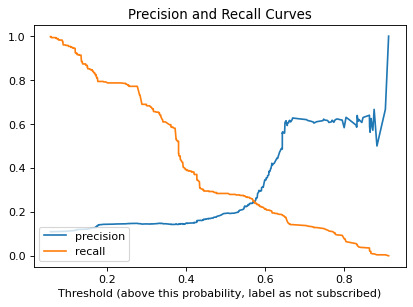

In [59]:
#precision/recall graph LG_model
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test_bank, model.predict_proba(X_test_bank)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as not subscribed)');
plt.title('Precision and Recall Curves');

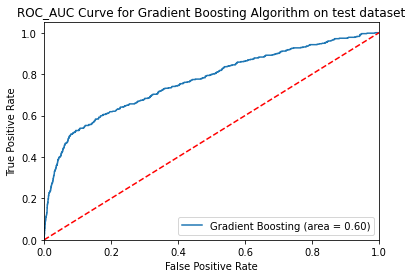

In [62]:
# ROC_AUC curve
fpr_gb, tpr_gb, threshold_gb = roc_curve(y_test_bank, model.predict_proba(rescaledTestX)[:,1])

plt.plot(fpr_gb, tpr_gb, label = 'Gradient Boosting (area = %0.2f)' % gb_roc_score)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC Curve for Gradient Boosting Algorithm on test dataset')
plt.legend(loc = 'lower right')
plt.show()